## Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load The Dataset

In [2]:
df = pd.read_csv("order.csv") #with pandas library

In [3]:
#show data
df.head()

,order_id,order_number,order_date,paid_date,status,shipping_total,shipping_tax_total,fee_total,fee_tax_total,tax_total,...,Product Item 1 SKU,Product Item 1 Quantity,Product Item 1 Total,Product Item 1 Subtotal,Product Item 2 Name,Product Item 2 id,Product Item 2 SKU,Product Item 2 Quantity,Product Item 2 Total,Product Item 2 Subtotal
0,25505,25505,2025-01-11 13:27:06,NaN,cancelled,0,0.0,0.00,0.0,0.0,...,6974434221178,1,3349.0,3349.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25502,25502,2025-01-10 15:44:29,NaN,cancelled,0,0.0,0.00,0.0,0.0,...,8806095274676,1,7999.0,7999.0,NaN,NaN,NaN,NaN,NaN,NaN
2,25385,25385,2025-01-08 21:37:52,NaN,cancelled,0,0.0,0.00,0.0,0.0,...,8806095138671,1,14199.0,14199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,25359,25359,2025-01-07 09:39:54,NaN,cancelled,0,0.0,0.00,0.0,0.0,...,4894947019135,1,8666.0,8666.0,NaN,NaN,NaN,NaN,NaN,NaN
4,25322,25322,2025-01-06 12:16:48,NaN,cancelled,0,0.0,527.75,0.0,0.0,...,NaN,1,10555.0,10555.0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [4]:
df.shape # we have 80 row and 79 columns 

(80, 79)

In [5]:
#check duplicates
print(df.duplicated().sum())

0


In [6]:
df.info() # get information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 79 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   order_id                                       80 non-null     int64  
 1   order_number                                   80 non-null     int64  
 2   order_date                                     80 non-null     object 
 3   paid_date                                      1 non-null      object 
 4   status                                         80 non-null     object 
 5   shipping_total                                 80 non-null     int64  
 6   shipping_tax_total                             80 non-null     float64
 7   fee_total                                      80 non-null     float64
 8   fee_tax_total                                  80 non-null     float64
 9   tax_total                                      80 non-nu

1. **We have many missing values**
2. **We need to convert datatype for dates like order_data column**
3. **We need to drop irrelevant columns**
4. **focus with Product Items Totally**

In [7]:
df.columns

Index(['order_id', 'order_number', 'order_date', 'paid_date', 'status',
       'shipping_total', 'shipping_tax_total', 'fee_total', 'fee_tax_total',
       'tax_total', 'cart_discount', 'order_discount', 'discount_total',
       'order_total', 'order_subtotal', 'order_key', 'order_currency',
       'payment_method', 'payment_method_title', 'transaction_id',
       'customer_ip_address', 'customer_user_agent', 'shipping_method',
       'customer_id', 'customer_user', 'customer_email', 'billing_first_name',
       'billing_last_name', 'billing_company', 'billing_email',
       'billing_phone', 'billing_address_1', 'billing_address_2',
       'billing_postcode', 'billing_city', 'billing_state', 'billing_country',
       'shipping_first_name', 'shipping_last_name', 'shipping_company',
       'shipping_phone', 'shipping_address_1', 'shipping_address_2',
       'shipping_postcode', 'shipping_city', 'shipping_state',
       'shipping_country', 'customer_note', 'wt_import_key', 'tax_items',
  

**We need to change column names for easier navigation**

In [8]:
#check Error and null values
for col in df.columns:
    null_count = df[col].isna().sum()
    print(f"{col}: Null Count is {null_count}")
    print(df[col].unique())
    print('_' * 70)


order_id: Null Count is 0
[25505 25502 25385 25359 25322 24844 24843 24842 24830 24812 24763 24759
 24758 24757 24752 24751 24748 24747 24741 24644 24643 24642 24641 24640
 24639 24638 24637 24636 24511 24510 24508 24507 24506 24505 24504 24503
 24502 24501 24500 24499 24498 24497 24496 24495 24494 24493 24492 24487
 24486 24484 24482 24481 24480 24479 24478 24477 24471 24468 24467 24462
 24461 24460 24459 24458 24457 24456 24455 24454 24453 24452 24451 24450
 24447 24446 24445 24444 24443 24442 24431 24430]
______________________________________________________________________
order_number: Null Count is 0
[25505 25502 25385 25359 25322 24844 24843 24842 24830 24812 24763 24759
 24758 24757 24752 24751 24748 24747 24741 24644 24643 24642 24641 24640
 24639 24638 24637 24636 24511 24510 24508 24507 24506 24505 24504 24503
 24502 24501 24500 24499 24498 24497 24496 24495 24494 24493 24492 24487
 24486 24484 24482 24481 24480 24479 24478 24477 24471 24468 24467 24462
 24461 24460 24459 2

In [9]:
df["Product Item 1 Name"].unique()

array(['نوثينج ايربودز سى ام تى برو  – رمادى (دولى)',
       'سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بنفسجى فاتح',
       'سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - كحلى',
       'تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا - اخضر',
       'هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيجا - رمادى',
       'كابل سامسونج تايب سى الى تايب سى 5 امبير 2 متر',
       'Oppo Reno 12 Pro, 12GB RAM, 512GB Storage - Grey',
       'انفينكس اكس ووتش 3 وى -رمادى', 'مى ريدمى بودز 6 بلاى - اسود',
       'سامسونج اى 16 , رام 6 جيجا , مساحة 128 جيجا - اخضر فاتح',
       'تلفاز ذكي Samsung Smart TV CU7000 50 بوصة (4K)',
       'Apple iPhone 15 Pro Max 512GB Natural Titanium-NO ACTIVE',
       'ريلمي بى 1 برو , رام 12 جيجا , مساحة 256 - ازرق',
       'ريدمى 14 سى , رام 8 جيجا ,مساحة 256 جيجا -اسود ميدنايت',
       'شاحن سامسونج 45 واط بى دى تايب سى - اسود (ضمان دولى)',
       'تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ابيض',
       'ايفون 16 برو ماكس 256 جيجا -ذهبى تيتانيوم (JAP)',
       'H

In [10]:
df["line_item_1"].value_counts()

line_item_1
name:Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage - Gold (International)|product_id:0|sku:|quantity:1|total:20999.00|sub_total:20999.00      6
name:تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ابيض|product_id:21794|sku:4894947020476|quantity:1|total:9099.00|sub_total:9099.00          4
name:ايفون 16 برو ماكس ,رام 8 جيجا , مساحة 256 جيجا - ذهبى تيتانيوم|product_id:0|sku:|quantity:1|total:70999.00|sub_total:70999.00             4
name:Apple iPhone 15 Pro Max 512GB Natural Titanium-NO ACTIVE|product_id:22397|sku:IPHONE-20|quantity:1|total:52999.00|sub_total:52999.00      4
name:تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا - اخضر|product_id:21795|sku:4894947019135|quantity:1|total:8666.00|sub_total:8666.00        4
name:وان بلس 12 ار , رام 16 جيجا , مساحة 256 جيجا- رمادى (دولى)|product_id:0|sku:|quantity:1|total:25499.00|sub_total:25499.00                 3
name:Oppo Reno 12 Pro, 12GB RAM, 512GB Storage - Grey|product_id:0|sku:|quantity:1|total:23499.00|sub_total:23499.00  

In [11]:
df.groupby("Product Item 1 id").agg({
    "Product Item 1 Name": "first",
    "Product Item 1 SKU": "first",
    "Product Item 1 Quantity": "sum",
    "Product Item 1 Total": "sum"
}).sort_values("Product Item 1 Quantity", ascending=False)


,Product Item 1 Name,Product Item 1 SKU,Product Item 1 Quantity,Product Item 1 Total
Product Item 1 id,,,,
22397.0,Apple iPhone 15 Pro Max 512GB Natural Titanium...,IPHONE-20,7,375493.0
4226.0,"سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بن...",8806095274676,4,27796.0
21795.0,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",4894947019135,4,34664.0
21794.0,"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ...",4894947020476,4,36396.0
24380.0,انفينكس اكس ووتش 3 وى -رمادى,4894947023958,3,7575.0
16061.0,كابل سامسونج تايب سى الى تايب سى 5 امبير 2 متر,8806094043709,2,969.0
21906.0,"سامسونج اى35,رام 8 جيجا,مساحة 128جيجا -كحلى",8806095511061,2,34398.0
24158.0,"سامسونج اى 16 , رام 6 جيجا , مساحة 128 جيجا - ...",8806095819020,2,19098.0
3922.0,"سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - ...",8806095367491,1,11499.0


In [12]:
df[df["Product Item 1 id"]==23005.0]["line_item_1"]

4    name:هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 12...
Name: line_item_1, dtype: object

In [13]:
product_summary = df.groupby("Product Item 1 Name").agg({
    "Product Item 1 Quantity": "sum",
    "Product Item 1 Total": "sum"
}).rename(columns={
    "Product Item 1 Quantity": "Total Quantity",
    "Product Item 1 Total": "Total Revenue"
})

# Calculate average price per unit
product_summary["Unit Price"] = product_summary["Total Revenue"] / product_summary["Total Quantity"]

# Sort by revenue
product_summary = product_summary.sort_values(by="Total Quantity", ascending=False)


In [14]:
product_summary

,Total Quantity,Total Revenue,Unit Price
Product Item 1 Name,,,
"ايفون 16 برو ماكس ,رام 8 جيجا , مساحة 256 جيجا - ذهبى تيتانيوم",15,1136185.0,75745.666667
Apple iPhone 15 Pro Max 512GB Natural Titanium-NO ACTIVE,7,375493.0,53641.857143
"Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage - Gold (International)",6,125994.0,20999.000000
"وان بلس 12 ار , رام 16 جيجا , مساحة 256 جيجا- رمادى (دولى)",5,137695.0,27539.000000
"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا - اخضر",4,34664.0,8666.000000
"iPhone 15 Pro Max, 256GB Storage - Titanium",4,245696.0,61424.000000
"سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بنفسجى فاتح",4,27796.0,6949.000000
"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ابيض",4,36396.0,9099.000000
"Oppo Reno 12 Pro, 12GB RAM, 512GB Storage - Grey",3,70497.0,23499.000000


In [15]:
product_name=df["Product Item 1 Name"].unique()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 79 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   order_id                                       80 non-null     int64  
 1   order_number                                   80 non-null     int64  
 2   order_date                                     80 non-null     object 
 3   paid_date                                      1 non-null      object 
 4   status                                         80 non-null     object 
 5   shipping_total                                 80 non-null     int64  
 6   shipping_tax_total                             80 non-null     float64
 7   fee_total                                      80 non-null     float64
 8   fee_tax_total                                  80 non-null     float64
 9   tax_total                                      80 non-nu

# in our task we need [order date, product, category, quantity, price, location]

In [17]:
# First, let's create the category mapping function since there's no explicit category column
def get_category(product_name):
    product_name = str(product_name).lower()
    
    categories = {
            'Phones': [
                'iphone', 'samsung', 'huawei', 'oppo', 'realme', 'redmi', 
                'mobile', 'phone', 'هاتف', 'ايفون', 'سامسونج', 'ريلمي',
                'ريدمي', 'وان بلس', 'فيفو', 'اى', 'a25', 'a35', 'a16', 'a05'
            ],
            'Earphones': [
                'earbuds', 'airpods', 'سماعات', 'headphones', 'ايربودز',
                'بودز', 'ear', 'سماعة', 'نوثينج', 'nothing'
            ],
            'Tablets': [
                'tablet', 'tab', 'تابلت', 'ميتباد', 'matepad', 'ipad'
            ],
            'Watches': [
                'watch', 'ساعة', 'apple watch', 'ساعات', 'ووتش'
            ],
            'TVs': [
                'tv', 'television', 'تلفاز', 'تلفزيون', 'smart tv'
            ],
            'Accessories': [
                'charger', 'شاحن', 'cable', 'كابل', 'سلك', 'كابل'
            ]
        }
    for category, keywords in categories.items():
        if any(keyword in product_name for keyword in keywords):
            return category
    
    return 'Other'
# Create the final DataFrame with exactly the requested columns
final_df = pd.DataFrame({
    "order_date": pd.to_datetime(df['order_date']).dt.strftime('%Y-%m-%d'),
    'product_name': df['Product Item 1 Name'],
    'category': df['Product Item 1 Name'].apply(get_category),
    'quantity': df['Product Item 1 Quantity'],
    'total_price': df['Product Item 1 Total'],
    'location': df['billing_state']  # or shipping_state if preferred
})




In [18]:
final_df.head()

,order_date,product_name,category,quantity,total_price,location
0,2025-01-11,نوثينج ايربودز سى ام تى برو – رمادى (دولى),Earphones,1,3349.0,EGGZ
1,2025-01-10,"سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بن...",Phones,1,7999.0,EGBH
2,2025-01-08,"سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - ...",Phones,1,14199.0,EGSHR
3,2025-01-07,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Other,1,8666.0,EGDK
4,2025-01-06,"هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيج...",Tablets,1,10555.0,EGC


In [19]:
final_df["location"].unique()

array(['EGGZ', 'EGBH', 'EGSHR', 'EGDK', 'EGC', 'EGASN', 'EGBA', 'EGAST',
       'EGKB', 'EGALX', 'EGFYM', 'EGJS', 'EGGH', 'EGDT', 'EGMNF', 'EGSHG'],
      dtype=object)

In [20]:
final_df

,order_date,product_name,category,quantity,total_price,location
0,2025-01-11,نوثينج ايربودز سى ام تى برو – رمادى (دولى),Earphones,1,3349.0,EGGZ
1,2025-01-10,"سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بن...",Phones,1,7999.0,EGBH
2,2025-01-08,"سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - ...",Phones,1,14199.0,EGSHR
3,2025-01-07,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Other,1,8666.0,EGDK
4,2025-01-06,"هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيج...",Tablets,1,10555.0,EGC
...,...,...,...,...,...,...
75,2024-12-24,"Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage...",Phones,1,20999.0,EGJS
76,2024-12-24,"Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage...",Phones,1,20999.0,EGJS
77,2024-12-24,"Realme GT 6T, 12GB RAM, 256GB Storage - Grey (...",Phones,2,42498.0,EGBA
78,2024-12-24,"OnePlus 12R, 16GB RAM, 256GB Storage - Blue (I...",Other,1,25499.0,EGSHG


### check for category when it ="Other"

In [21]:
final_df[final_df["category"]=="Other"]

,order_date,product_name,category,quantity,total_price,location
3,2025-01-07,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Other,1,8666.0,EGDK
12,2025-01-04,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Other,1,8666.0,EGBH
16,2025-01-02,"ريدمى 14 سى , رام 8 جيجا ,مساحة 256 جيجا -اسود...",Other,1,6849.0,EGKB
19,2025-01-01,"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ...",Other,1,9099.0,EGALX
20,2025-01-01,"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ...",Other,1,9099.0,EGALX
21,2025-01-01,"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ...",Other,1,9099.0,EGALX
22,2025-01-01,"تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ...",Other,1,9099.0,EGALX
24,2025-01-01,"Honor Magic 6 Pro, 12GB RAM, 512GB Storage - G...",Other,1,41000.0,EGC
26,2024-12-31,مي قلاية ذكية 3.5 لتر,Other,1,6555.0,EGGZ
32,2024-12-26,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Other,1,8666.0,EGFYM


### All of them are Phones but one of them isn't(مي قلاية ذكية 3.5 لتر)

In [22]:
final_df["category"] = final_df["category"].replace({"Other": "Phones"})

In [23]:
final_df["category"].unique()

array(['Earphones', 'Phones', 'Tablets', 'Watches'], dtype=object)

In [24]:
final_df.loc[final_df['product_name'] == 'مي قلاية ذكية 3.5 لتر',"category"] = 'Other' #rename the cateogry for this

In [25]:
final_df["category"].unique()

array(['Earphones', 'Phones', 'Tablets', 'Watches', 'Other'], dtype=object)

In [26]:
final_df[final_df['product_name'] == 'مي قلاية ذكية 3.5 لتر']

,order_date,product_name,category,quantity,total_price,location
26,2024-12-31,مي قلاية ذكية 3.5 لتر,Other,1,6555.0,EGGZ


## work on location and product name

In [27]:
#work on location first
location_mapping = {
    'EGGZ': 'Giza',
    'EGBH': 'Beheira',
    'EGSHR': 'Sharqia',
    'EGDK': 'Dakahlia',
    'EGC': 'Cairo',
    'EGASN': 'Aswan',
    'EGBA': 'Beni Suef',
    'EGAST': 'Asyut',
    'EGKB': 'Qalyubia',
    'EGALX': 'Alexandria',
    'EGFYM': 'Faiyum',
    'EGJS': 'South Sinai',
    'EGGH': 'Gharbia',
    'EGDT': 'Damietta',
    'EGMNF': 'Monufia',
    'EGSHG': 'Sohag'
}
for i in location_mapping:
    final_df['location'] = final_df['location'].apply(lambda x:location_mapping.get(i) if (x==i) else x )


In [28]:
final_df

,order_date,product_name,category,quantity,total_price,location
0,2025-01-11,نوثينج ايربودز سى ام تى برو – رمادى (دولى),Earphones,1,3349.0,Giza
1,2025-01-10,"سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بن...",Phones,1,7999.0,Beheira
2,2025-01-08,"سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - ...",Phones,1,14199.0,Sharqia
3,2025-01-07,"تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا ...",Phones,1,8666.0,Dakahlia
4,2025-01-06,"هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيج...",Tablets,1,10555.0,Cairo
...,...,...,...,...,...,...
75,2024-12-24,"Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage...",Phones,1,20999.0,South Sinai
76,2024-12-24,"Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage...",Phones,1,20999.0,South Sinai
77,2024-12-24,"Realme GT 6T, 12GB RAM, 256GB Storage - Grey (...",Phones,2,42498.0,Beni Suef
78,2024-12-24,"OnePlus 12R, 16GB RAM, 256GB Storage - Blue (I...",Phones,1,25499.0,Sohag


## Standardize the product name

In [29]:
final_df["product_name"].unique()

array(['نوثينج ايربودز سى ام تى برو  – رمادى (دولى)',
       'سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بنفسجى فاتح',
       'سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - كحلى',
       'تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا - اخضر',
       'هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيجا - رمادى',
       'كابل سامسونج تايب سى الى تايب سى 5 امبير 2 متر',
       'Oppo Reno 12 Pro, 12GB RAM, 512GB Storage - Grey',
       'انفينكس اكس ووتش 3 وى -رمادى', 'مى ريدمى بودز 6 بلاى - اسود',
       'سامسونج اى 16 , رام 6 جيجا , مساحة 128 جيجا - اخضر فاتح',
       'تلفاز ذكي Samsung Smart TV CU7000 50 بوصة (4K)',
       'Apple iPhone 15 Pro Max 512GB Natural Titanium-NO ACTIVE',
       'ريلمي بى 1 برو , رام 12 جيجا , مساحة 256 - ازرق',
       'ريدمى 14 سى , رام 8 جيجا ,مساحة 256 جيجا -اسود ميدنايت',
       'شاحن سامسونج 45 واط بى دى تايب سى - اسود (ضمان دولى)',
       'تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ابيض',
       'ايفون 16 برو ماكس 256 جيجا -ذهبى تيتانيوم (JAP)',
       'H

In [30]:
standardized_map = {
    "نوثينج ايربودز سى ام تى برو  – رمادى (دولى)": "Nothing Earbuds CMT Pro",
    "سامسونج اى 05 اس , رام 4 جيجا,مساحة 128جيجا-بنفسجى فاتح": "Samsung A05s",
    "سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - كحلى": "Samsung A25",
    "تيكنو سبارك 20 برو ,رام 8 جيجا ,مساحة 256جيجا - اخضر": "Tecno Spark 20 Pro",
    "هواوى ميتباد SE 11 ,رام 8 جيجا , مساحة 128 جيجا - رمادى": "Huawei MatePad SE 11",
    "كابل سامسونج تايب سى الى تايب سى 5 امبير 2 متر": "Samsung USB-C Cable 2m",
    "Oppo Reno 12 Pro, 12GB RAM, 512GB Storage - Grey": "Oppo Reno 12 Pro",
    "انفينكس اكس ووتش 3 وى -رمادى": "Infinix X Watch 3Y",
    "مى ريدمى بودز 6 بلاى - اسود": "Mi Redmi Buds 6 Play",
    "سامسونج اى 16 , رام 6 جيجا , مساحة 128 جيجا - اخضر فاتح": "Samsung A16",
    "تلفاز ذكي Samsung Smart TV CU7000 50 بوصة (4K)": "Samsung Smart TV CU7000 50\"",
    "Apple iPhone 15 Pro Max 512GB Natural Titanium-NO ACTIVE": "iPhone 15 Pro Max",
    "ريلمي بى 1 برو , رام 12 جيجا , مساحة 256 - ازرق": "Realme B1 Pro",
    "ريدمى 14 سى , رام 8 جيجا ,مساحة 256 جيجا -اسود ميدنايت": "Redmi 14C",
    "شاحن سامسونج 45 واط بى دى تايب سى - اسود (ضمان دولى)": "Samsung 45W PD Charger",
    "تيكنو كامون 30 ,رام 8 جيجا , مساحة 256 جيجا - ابيض": "Tecno Camon 30",
    "ايفون 16 برو ماكس 256 جيجا -ذهبى تيتانيوم (JAP)": "iPhone 16 Pro Max",
    "Honor Magic 6 Pro, 12GB RAM, 512GB Storage - Green (International)": "Honor Magic 6 Pro",
    "مي قلاية ذكية 3.5 لتر": "Mi Smart Air Fryer 3.5L",
    "ايربودز انكر بى 40 اى - وردى": "Anker B40i Earbuds",
    "Realme GT 6T, 12GB RAM, 256GB Storage - Green (International)": "Realme GT 6T",
    "ايفون 16 برو ماكس ,رام 8 جيجا , مساحة 256 جيجا - ذهبى تيتانيوم": "iPhone 16 Pro Max",
    "سامسونج اى35,رام 8 جيجا,مساحة 128جيجا -كحلى": "Samsung A35",
    "Honor 200, 12GB RAM, 512GB Storage - Black": "Honor 200",
    "وان بلس 12 ار , رام 16 جيجا , مساحة 256 جيجا- رمادى (دولى)": "OnePlus 12R",
    "وان بلس 12 ار , رام 16 جيجا , مساحة 256 جيجا- ازرق (دولى)": "OnePlus 12R",
    "ايفون 15 برو ماكس 256 جيجا - تيتانيوم": "iPhone 15 Pro Max",
    "هونور اكس 9 سى, رام 12 جيجا , مساحة 256 جيجا – برتقالى": "Honor X9C",
    "فيفو فى 40 لايت , رام 8 جيجا , مساحة 256 جيجا -رصاصى": "Vivo V40 Lite",
    "Realme GT 6T, 12GB RAM, 256GB Storage - Grey (International)": "Realme GT 6T",
    "ريلمى 13 برو بلس 5G , رام 12 جيجا , مساحة 512 جيجا -ذهبى(دولى)": "Realme 13 Pro Plus 5G",
    "ابل ووتش سيريس 10 - رصاصى": "Apple Watch Series 10",
    "Oppo Reno 12, 12GB RAM, 512GB Storage - Brown": "Oppo Reno 12",
    "iPhone 15 Pro Max, 256GB Storage - Titanium": "iPhone 15 Pro Max",
    "iPhone 16 Pro Max, 8GB RAM, 256GB Storage - Gold Titanium": "iPhone 16 Pro Max",
    "سامسونج اى 25 , رام 8 جيجا , مساحة 256 جيجا - ازرق فاتح": "Samsung A25",
    "Realme 13 Pro Plus 5G, 12GB RAM, 512GB Storage - Gold (International)": "Realme 13 Pro Plus 5G",
    "iPhone 15 Pro Max, 256GB Storage - Titanium (Copy)": "iPhone 15 Pro Max",
    "Honor X6 Pro, 6GB RAM, 128GB Storage - Black": "Honor X6 Pro",
    "OnePlus 12R, 16GB RAM, 256GB Storage - Blue (International)": "OnePlus 12R",
    "Realme C61, 8GB RAM, 256GB Storage - Gold (International)": "Realme C61"
}

# Apply mapping
final_df["product_name"] = final_df["product_name"].replace(standardized_map)


In [31]:
final_df["product_name"].unique() #check for new product name

array(['Nothing Earbuds CMT Pro', 'Samsung A05s', 'Samsung A25',
       'Tecno Spark 20 Pro', 'Huawei MatePad SE 11',
       'Samsung USB-C Cable 2m', 'Oppo Reno 12 Pro', 'Infinix X Watch 3Y',
       'Mi Redmi Buds 6 Play', 'Samsung A16',
       'Samsung Smart TV CU7000 50"', 'iPhone 15 Pro Max',
       'Realme B1 Pro', 'Redmi 14C', 'Samsung 45W PD Charger',
       'Tecno Camon 30', 'iPhone 16 Pro Max', 'Honor Magic 6 Pro',
       'Mi Smart Air Fryer 3.5L', 'Anker B40i Earbuds', 'Realme GT 6T',
       'Samsung A35', 'Honor 200', 'OnePlus 12R', 'Honor X9C',
       'Vivo V40 Lite', 'Realme 13 Pro Plus 5G', 'Apple Watch Series 10',
       'Oppo Reno 12', 'Honor X6 Pro', 'Realme C61'], dtype=object)

In [32]:
final_df.describe()

,quantity,total_price
count,80.000000,80.000000
mean,1.175000,38574.087500
std,0.568698,49054.495862
min,1.000000,450.000000
25%,1.000000,9574.000000
50%,1.000000,23499.000000
75%,1.000000,54499.000000
max,4.000000,283996.000000


In [33]:
final_df.describe(include="O")

,order_date,product_name,category,location
count,80,80,80,80
unique,15,31,5,16
top,2024-12-25,iPhone 15 Pro Max,Phones,Cairo
freq,24,13,75,29


In [34]:
final_df

,order_date,product_name,category,quantity,total_price,location
0,2025-01-11,Nothing Earbuds CMT Pro,Earphones,1,3349.0,Giza
1,2025-01-10,Samsung A05s,Phones,1,7999.0,Beheira
2,2025-01-08,Samsung A25,Phones,1,14199.0,Sharqia
3,2025-01-07,Tecno Spark 20 Pro,Phones,1,8666.0,Dakahlia
4,2025-01-06,Huawei MatePad SE 11,Tablets,1,10555.0,Cairo
...,...,...,...,...,...,...
75,2024-12-24,Realme 13 Pro Plus 5G,Phones,1,20999.0,South Sinai
76,2024-12-24,Realme 13 Pro Plus 5G,Phones,1,20999.0,South Sinai
77,2024-12-24,Realme GT 6T,Phones,2,42498.0,Beni Suef
78,2024-12-24,OnePlus 12R,Phones,1,25499.0,Sohag


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    80 non-null     object 
 1   product_name  80 non-null     object 
 2   category      80 non-null     object 
 3   quantity      80 non-null     int64  
 4   total_price   80 non-null     float64
 5   location      80 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.9+ KB


## work on datatype for order_date

In [36]:
# Convert order_date to proper datetime format
final_df['order_date'] = pd.to_datetime(final_df['order_date'], errors='coerce')

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    80 non-null     datetime64[ns]
 1   product_name  80 non-null     object        
 2   category      80 non-null     object        
 3   quantity      80 non-null     int64         
 4   total_price   80 non-null     float64       
 5   location      80 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 3.9+ KB


## we need to extract year, month, quarter, day from order_date

In [55]:
final_df['order_year'] = final_df['order_date'].dt.year
final_df['order_month'] = final_df['order_date'].dt.month_name()
final_df['order_quarter'] = final_df['order_date'].dt.quarter
final_df["order_day"] = final_df["order_date"].dt.day_name()

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        80 non-null     datetime64[ns]
 1   product_name      80 non-null     object        
 2   category          80 non-null     object        
 3   quantity          80 non-null     int64         
 4   total_price       80 non-null     float64       
 5   location          80 non-null     object        
 6   order_year        80 non-null     int32         
 7   order_month_name  80 non-null     object        
 8   order_quarter     80 non-null     int32         
 9   order_day         80 non-null     object        
 10  order_month       80 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 6.4+ KB


_______________________________

# Let's Start Analysis and solve the questions

In [57]:
#Q1: Total Sales
Total_sales = final_df["total_price"].sum()

In [58]:
Total_sales

np.float64(3085927.0)

In [59]:
## sales analysis by weekday
final_df.groupby(['order_day'])[['total_price']].sum().sort_values(by='total_price',ascending = False)

,total_price
order_day,
Wednesday,1846403.0
Tuesday,567154.0
Thursday,473868.0
Friday,101196.0
Monday,42950.0
Sunday,32043.0
Saturday,22313.0


In [60]:
## sales analysis by month
final_df.groupby(['order_month'])[['total_price']].sum().sort_values(by='total_price',ascending = False)

,total_price
order_month,
December,2662465.0
January,423462.0


In [93]:
# Group total sales by month
monthly_sales = final_df.groupby("order_month")[["total_price"]].sum()

# Calculate percentage of each month's sales
monthly_sales["percentage"] = (monthly_sales["total_price"] / monthly_sales["total_price"].sum() * 100).round(2)

# Sort by total_price descending
monthly_sales = monthly_sales.sort_values(by="total_price", ascending=False)

monthly_sales


,total_price,percentage
order_month,,
December,2662465.0,86.28
January,423462.0,13.72


In [62]:
## sales by location
final_df.groupby(['location'])[['total_price']].sum().sort_values(by='total_price',ascending = False)

,total_price
location,
Cairo,979792.0
Gharbia,922388.0
Giza,287346.0
Alexandria,242892.0
Sharqia,239695.0
South Sinai,115996.0
Qalyubia,72848.0
Beni Suef,64466.0
Beheira,40264.0


In [63]:
## quantity by location
final_df.groupby(['location'])[['quantity']].sum().sort_values(by='quantity',ascending = False)

,quantity
location,
Cairo,33
Gharbia,12
Giza,11
Alexandria,8
Beni Suef,5
Sharqia,5
South Sinai,4
Aswan,3
Beheira,3


In [91]:
# Group total sales by location
location_sales = final_df.groupby("location")["total_price"].sum().reset_index()

# Calculate percentage
total_l = location_sales["total_price"].sum()
location_sales["percentage"] = (location_sales["total_price"] / total_l * 100).round(2)

# Sort by percentage descending
location_sales = location_sales.sort_values(by="percentage", ascending=False).reset_index(drop=True)

print(location_sales)


       location  total_price  percentage
0         Cairo     979792.0       31.75
1       Gharbia     922388.0       29.89
2          Giza     287346.0        9.31
3    Alexandria     242892.0        7.87
4       Sharqia     239695.0        7.77
5   South Sinai     115996.0        3.76
6      Qalyubia      72848.0        2.36
7     Beni Suef      64466.0        2.09
8       Beheira      40264.0        1.30
9      Dakahlia      29665.0        0.96
10        Sohag      25499.0        0.83
11     Damietta      21999.0        0.71
12        Aswan      19797.0        0.64
13       Faiyum      17332.0        0.56
14      Monufia       5249.0        0.17
15        Asyut        699.0        0.02


In [65]:
#sales by category
final_df.groupby(['category'])[['total_price']].sum().sort_values(by='total_price',ascending = False)

,total_price
category,
Phones,3035894.0
Watches,29574.0
Tablets,10555.0
Other,6555.0
Earphones,3349.0


In [67]:
# quantity by category
final_df.groupby(['category'])[['quantity']].sum().sort_values(by='quantity',ascending = False)

,quantity
category,
Phones,87
Watches,4
Earphones,1
Other,1
Tablets,1


In [69]:
#sales by year
final_df.groupby(['order_year'])[['total_price']].sum().sort_values(by='total_price',ascending = False)

,total_price
order_year,
2024,2662465.0
2025,423462.0


C:\Users\youse\AppData\Local\Temp\ipykernel_12532\398847907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="quantity", y="product_name", palette="viridis")


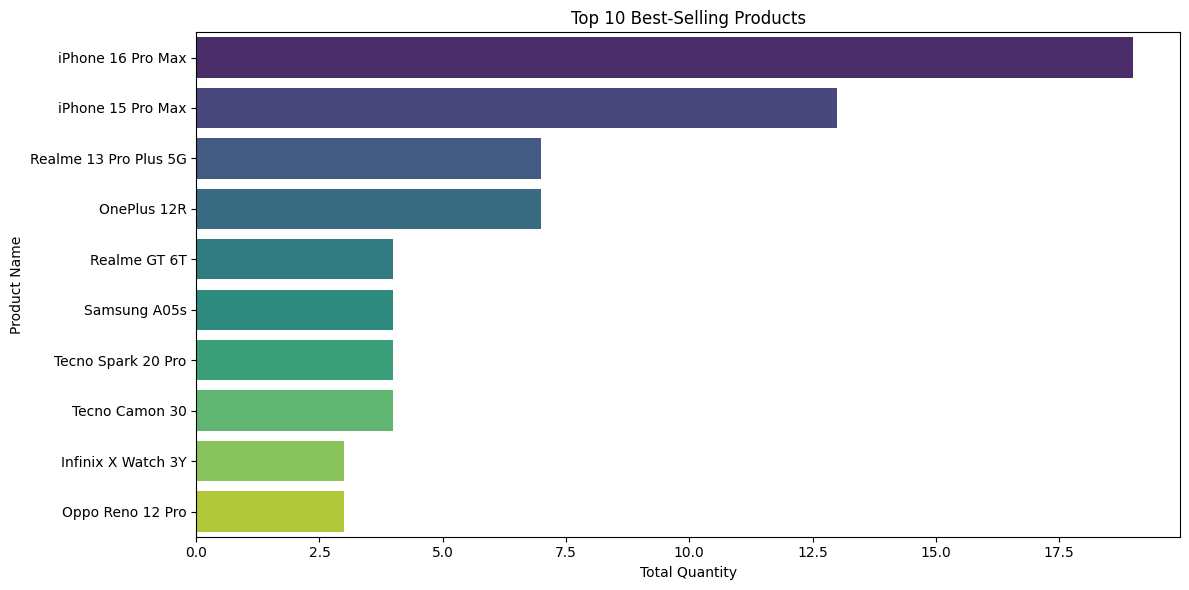

In [73]:
# Best-selling products
top_products = final_df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="quantity", y="product_name", palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [79]:
import matplotlib.ticker as ticker

C:\Users\youse\AppData\Local\Temp\ipykernel_12532\1245893786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="quantity", y="product_name", palette="viridis")


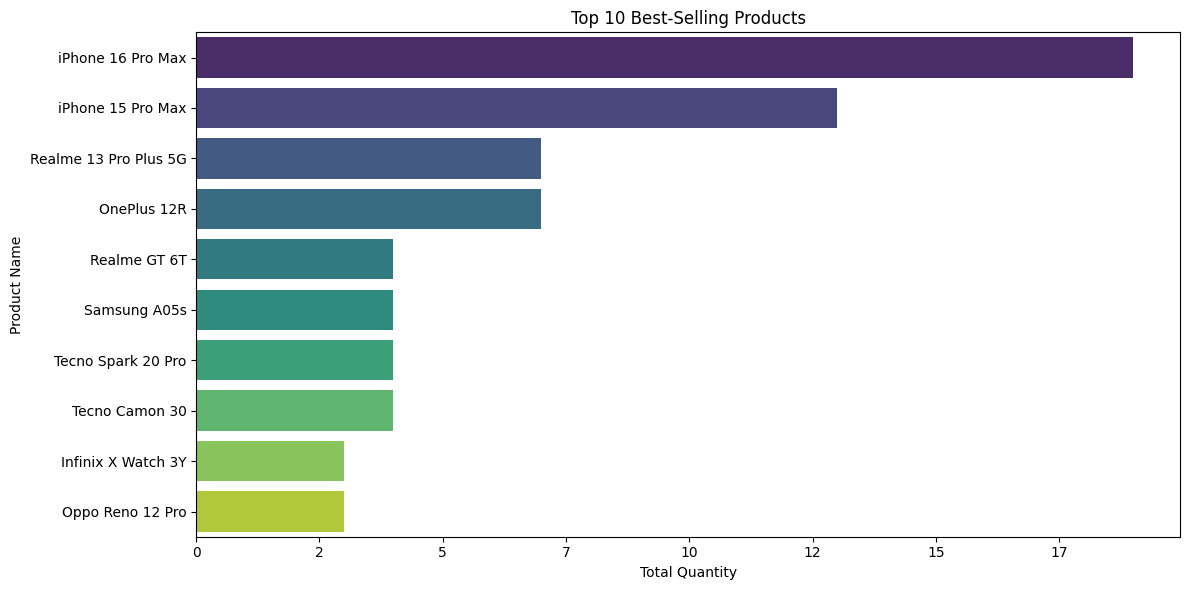

In [82]:
# Best-selling products
top_products = final_df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x="quantity", y="product_name", palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity")
plt.ylabel("Product Name")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_12532\1321525664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x="order_month", y="total_price", palette="Blues_d")


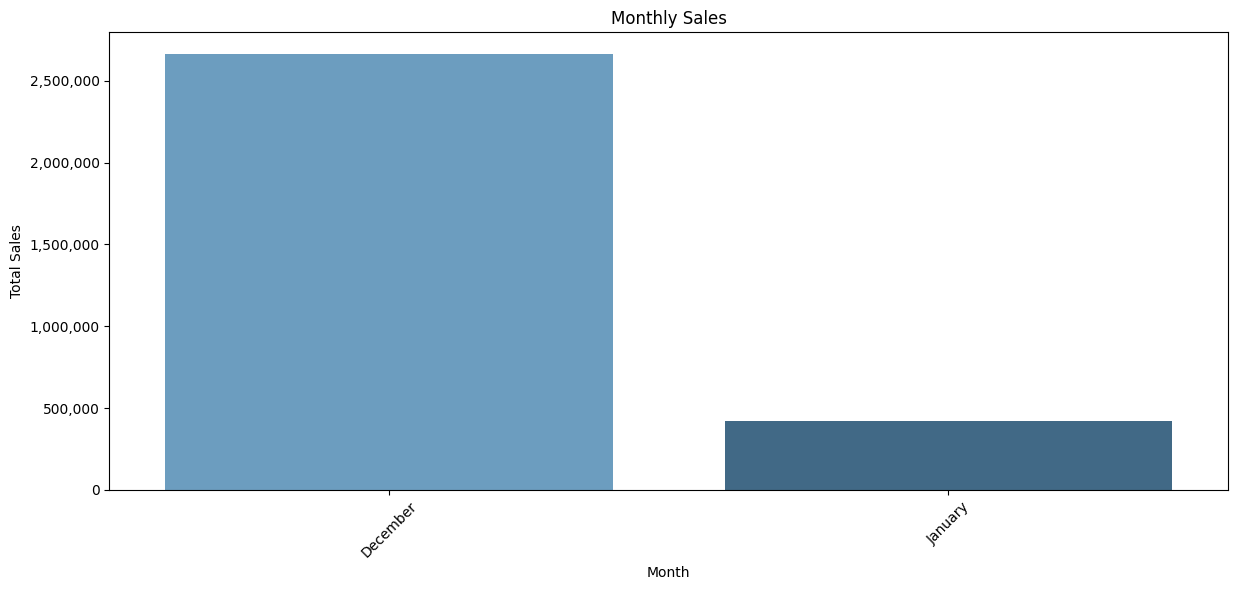

In [81]:

monthly_sales = final_df.groupby("order_month")["total_price"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x="order_month", y="total_price", palette="Blues_d")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_12532\350261452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="total_price", y="location", palette="rocket")


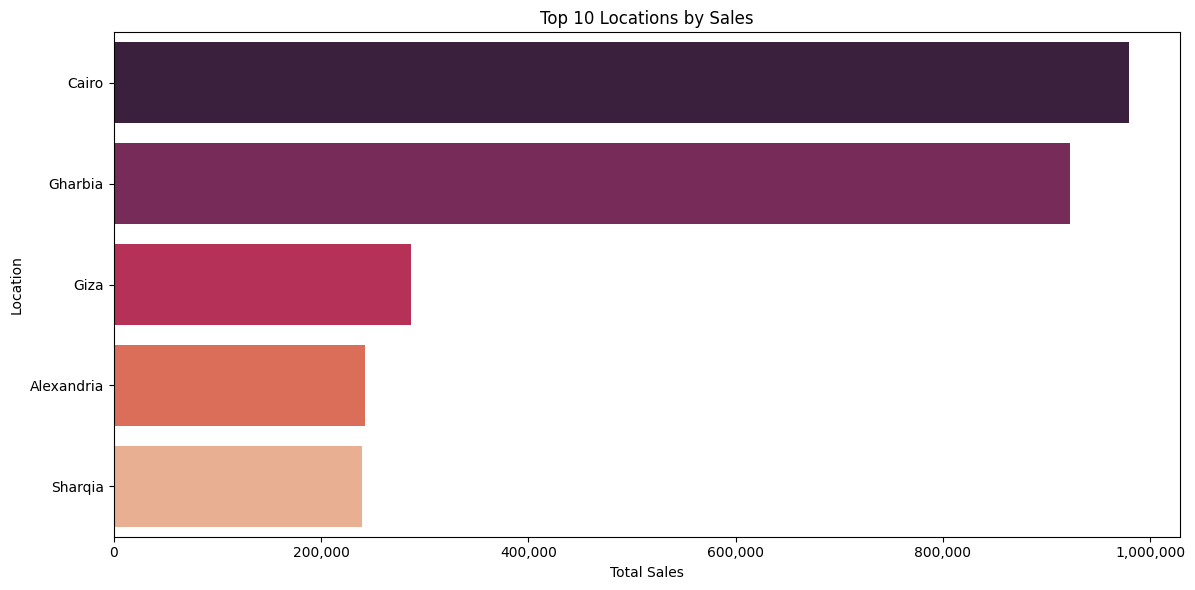

In [78]:
import matplotlib.ticker as ticker

top_regions = final_df.groupby("location")["total_price"].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x="total_price", y="location", palette="rocket")
plt.title("Top 10 Locations by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Location")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_12532\1044066887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="total_price", y="category", palette="Set2")


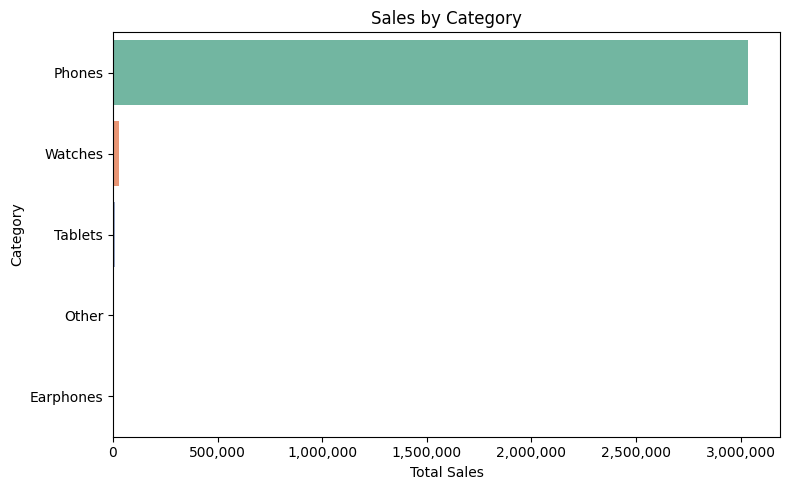

In [85]:
category_sales = final_df.groupby("category")["total_price"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x="total_price", y="category", palette="Set2")
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_12532\375181094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_quantity, x="quantity", y="category", palette="Set2")


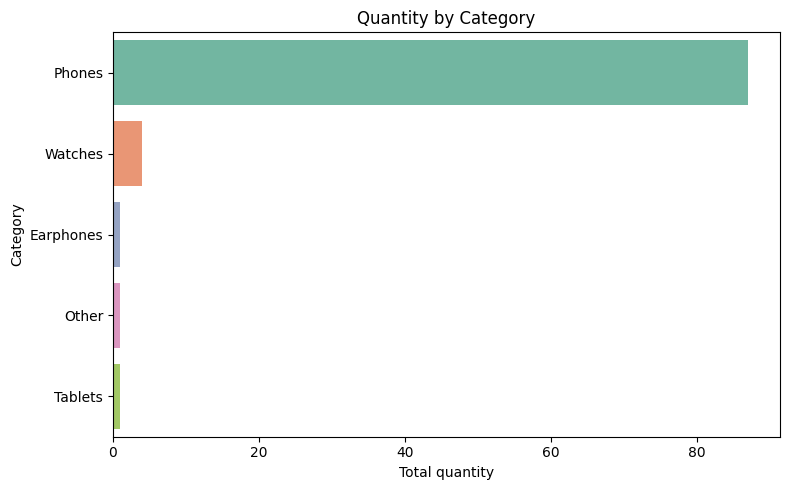

In [89]:
category_quantity = final_df.groupby("category")["quantity"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_quantity, x="quantity", y="category", palette="Set2")
plt.title("Quantity by Category")
plt.xlabel("Total quantity")
plt.ylabel("Category")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

In [90]:
final_df.to_csv("final_data.csv",index = False)

# Conclusion:

1. **Product Performance**
The dataset includes 31 unique products, with “iPhone 15 Pro Max” being the best-selling product (13 sales), reflecting strong demand for high-end devices.


3. **Category Breakdown**
   Out of 80 records, 75 belong to the “Phones” category, confirming that mobile phones dominate sales.

   Other categories have minimal sales and may represent accessories or emerging product lines — worth exploring for bundling or cross-sell opportunities.

   
5. **Geographic Insights**
   Sales are distributed across 16 locations, with Cairo accounting for 29 orders (32%), and with Gharbia (30%) making it the strongest sales region.

   This suggests focusing marketing efforts in Cairo and Gharbia could yield the highest ROI, while other regions may need targeted campaigns to boost performance.
